SetUP

### train data 준비

In [1]:
# 구글 드라이브 연동
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# 압축풀기
!unzip '/content/drive/MyDrive/project.zip'

Archive:  /content/drive/MyDrive/project.zip
   creating: project/normal/
  inflating: project/normal/100 (2).jpg  
  inflating: project/normal/100.jpg  
  inflating: project/normal/101 (2).jpg  
  inflating: project/normal/101.jpg  
  inflating: project/normal/102.jpg  
  inflating: project/normal/103 (2).jpg  
  inflating: project/normal/103.jpg  
  inflating: project/normal/105.jpg  
  inflating: project/normal/106.jpg  
  inflating: project/normal/107 (2).jpg  
  inflating: project/normal/107.jpg  
  inflating: project/normal/109 (2).jpg  
  inflating: project/normal/109.jpg  
  inflating: project/normal/111 (2).jpg  
  inflating: project/normal/111.jpg  
  inflating: project/normal/112 (2).jpg  
  inflating: project/normal/112.jpg  
  inflating: project/normal/113 (2).jpg  
  inflating: project/normal/113.jpg  
  inflating: project/normal/114.jpg  
  inflating: project/normal/115.jpg  
  inflating: project/normal/116 (2).jpg  
  inflating: project/normal/116.jpg  
  inflating: pro

In [3]:
# normal 폴더에 디코딩 가능 여부 확인 및 파일 저장
import tensorflow as tf
import glob
import os

# Get a list of image paths
image_paths = glob.glob(os.path.join('/content/project/normal', '*.jpg'))

# Create the 'norm' directory
norm_directory = '/content/project/norm'
os.makedirs(norm_directory, exist_ok=True)

for i, image_path in enumerate(image_paths):
    print(i, image_path)

    try:
        image_contents = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image_contents, channels=3)

        # Construct the new path in the 'norm' directory
        new_image_path = os.path.join(norm_directory, os.path.basename(image_path))

        # Save the image in the 'norm' directory
        with tf.io.gfile.GFile(new_image_path, 'wb') as f:
            f.write(image_contents.numpy())

        print("Moved and processed:", image_path)
    except tf.errors.InvalidArgumentError:
        print("Error decoding image:", image_path, "- Skipping this image")


0 /content/project/normal/norm_1053.jpg
Moved and processed: /content/project/normal/norm_1053.jpg
1 /content/project/normal/norm_305.jpg
Moved and processed: /content/project/normal/norm_305.jpg
2 /content/project/normal/norm_695.jpg
Moved and processed: /content/project/normal/norm_695.jpg
3 /content/project/normal/norm_132.jpg
Moved and processed: /content/project/normal/norm_132.jpg
4 /content/project/normal/426.jpg
Moved and processed: /content/project/normal/426.jpg
5 /content/project/normal/norm_735.jpg
Moved and processed: /content/project/normal/norm_735.jpg
6 /content/project/normal/5_00000358.jpg
Moved and processed: /content/project/normal/5_00000358.jpg
7 /content/project/normal/454.jpg
Moved and processed: /content/project/normal/454.jpg
8 /content/project/normal/norm_245.jpg
Moved and processed: /content/project/normal/norm_245.jpg
9 /content/project/normal/norm_215.jpg
Moved and processed: /content/project/normal/norm_215.jpg
10 /content/project/normal/norm_884.jpg
Move

In [4]:
# unnormal 폴더에 디코딩 가능 여부 확인 및 파일 저장
import tensorflow as tf
import glob
import os

# Get a list of image paths
image_paths = glob.glob(os.path.join('/content/project/unnormal', '*.jpg'))

# Create the 'norm' directory
norm_directory = '/content/project/unnorm'
os.makedirs(norm_directory, exist_ok=True)

for i, image_path in enumerate(image_paths):
    print(i, image_path)

    try:
        image_contents = tf.io.read_file(image_path)
        image = tf.image.decode_jpeg(image_contents, channels=3)

        # Construct the new path in the 'norm' directory
        new_image_path = os.path.join(norm_directory, os.path.basename(image_path))

        # Save the image in the 'norm' directory
        with tf.io.gfile.GFile(new_image_path, 'wb') as f:
            f.write(image_contents.numpy())

        print("Moved and processed:", image_path)
    except tf.errors.InvalidArgumentError:
        print("Error decoding image:", image_path, "- Skipping this image")


0 /content/project/unnormal/5_00000227.jpg
Moved and processed: /content/project/unnormal/5_00000227.jpg
1 /content/project/unnormal/524.jpg
Error decoding image: /content/project/unnormal/524.jpg - Skipping this image
2 /content/project/unnormal/5_00000115.jpg
Moved and processed: /content/project/unnormal/5_00000115.jpg
3 /content/project/unnormal/unnorm_1363.jpg
Moved and processed: /content/project/unnormal/unnorm_1363.jpg
4 /content/project/unnormal/unnorm_454.jpg
Moved and processed: /content/project/unnormal/unnorm_454.jpg
5 /content/project/unnormal/5_00000168.jpg
Moved and processed: /content/project/unnormal/5_00000168.jpg
6 /content/project/unnormal/307.jpg
Moved and processed: /content/project/unnormal/307.jpg
7 /content/project/unnormal/335.jpg
Moved and processed: /content/project/unnormal/335.jpg
8 /content/project/unnormal/unnorm_1105.jpg
Moved and processed: /content/project/unnormal/unnorm_1105.jpg
9 /content/project/unnormal/unnorm_1292.jpg
Moved and processed: /cont

In [5]:
# 파일 하나로 통합
import os
import shutil

# Define paths
project_path = '/content/project'
norm_path = os.path.join(project_path, 'norm')
unnorm_path = os.path.join(project_path, 'unnorm')
destination_path = os.path.join(project_path, 'after')

# Create the 'after' directory
os.makedirs(destination_path, exist_ok=True)

# Move 'norm' and 'unnorm' subdirectories into 'after'
shutil.move(norm_path, os.path.join(destination_path, 'norm'))
shutil.move(unnorm_path, os.path.join(destination_path, 'unnorm'))

print("Organized directory structure.")

Organized directory structure.


In [6]:
# 기존 폴더(normal, unnormal) 삭제
import shutil

directory_path = '/content/project/normal'
shutil.rmtree(directory_path)
directory_path = '/content/project/unnormal'
shutil.rmtree(directory_path)

- 이미지 파일을 원형만 사용하도록 전처리 작업 수행

In [7]:
import cv2
import numpy as np
import os
import shutil

# 디렉토리 경로 정의 (원본 이미지)
original_directory = '/content/project/after/norm/'

# 디렉토리 경로 정의 (크롭된 이미지)
cropped_directory = '/content/project/after/crp_norm/'

# 크롭된 이미지를 저장할 새로운 폴더 생성
os.makedirs(cropped_directory, exist_ok=True)

# 원본 디렉토리 내 모든 .jpg 파일 목록 가져오기
jpg_files = [file for file in os.listdir(original_directory) if file.lower().endswith('.jpg')]

# 각 .jpg 파일에 대해 반복 실행
for jpg_file in jpg_files:
    # 원본 이미지의 전체 경로 생성
    original_image_path = os.path.join(original_directory, jpg_file)

    # 원본 이미지 읽기
    original_image = cv2.imread(original_image_path)

    # 원의 중심점 정의 (x, y)
    center_point = (original_image.shape[1] // 2, original_image.shape[0] // 2)

    # 원의 반지름 정의 (원의 크기를 조정하려면 이 값을 변경)
    circle_radius = 600  # 원하는 반지름 값으로 변경

    # 원 모양의 마스크 생성
    mask = np.zeros_like(original_image)
    cv2.circle(mask, center_point, circle_radius, (255, 255, 255), -1)

    # 마스크를 원본 이미지에 적용
    cropped_image = cv2.bitwise_and(original_image, mask)

    # 크롭된 이미지를 저장할 출력 경로 생성
    cropped_image_path = os.path.join(cropped_directory, f"cropped_{jpg_file}")

    # 크롭된 이미지 저장
    cv2.imwrite(cropped_image_path, cropped_image)

    # # 원본 이미지를 크롭된 디렉토리로 복사
    # shutil.copy(original_image_path, cropped_directory)

    # 원본 이미지를 원본 디렉토리에서 삭제
    os.remove(original_image_path)

print(f"크롭된 이미지 저장 완료: {cropped_image_path}")
print(f"원본 이미지 삭제: {original_image_path}")


크롭된 이미지 저장 완료: /content/project/after/crp_norm/cropped_norm_868.jpg
원본 이미지 삭제: /content/project/after/norm/norm_868.jpg


In [8]:
import cv2
import numpy as np
import os
import shutil

# 디렉토리 경로 정의 (원본 이미지)
original_directory = '/content/project/after/unnorm/'

# 디렉토리 경로 정의 (크롭된 이미지)
cropped_directory = '/content/project/after/crp_unnorm/'

# 크롭된 이미지를 저장할 새로운 폴더 생성
os.makedirs(cropped_directory, exist_ok=True)

# 원본 디렉토리 내 모든 .jpg 파일 목록 가져오기
jpg_files = [file for file in os.listdir(original_directory) if file.lower().endswith('.jpg')]

# 각 .jpg 파일에 대해 반복 실행
for jpg_file in jpg_files:
    # 원본 이미지의 전체 경로 생성
    original_image_path = os.path.join(original_directory, jpg_file)

    # 원본 이미지 읽기
    original_image = cv2.imread(original_image_path)

    # 원의 중심점 정의 (x, y)
    center_point = (original_image.shape[1] // 2, original_image.shape[0] // 2)

    # 원의 반지름 정의 (원의 크기를 조정하려면 이 값을 변경)
    circle_radius = 600  # 원하는 반지름 값으로 변경

    # 원 모양의 마스크 생성
    mask = np.zeros_like(original_image)
    cv2.circle(mask, center_point, circle_radius, (255, 255, 255), -1)

    # 마스크를 원본 이미지에 적용
    cropped_image = cv2.bitwise_and(original_image, mask)

    # 크롭된 이미지를 저장할 출력 경로 생성
    cropped_image_path = os.path.join(cropped_directory, f"cropped_{jpg_file}")

    # 크롭된 이미지 저장
    cv2.imwrite(cropped_image_path, cropped_image)

    # # 원본 이미지를 크롭된 디렉토리로 복사
    # shutil.copy(original_image_path, cropped_directory)

    # 원본 이미지를 원본 디렉토리에서 삭제
    os.remove(original_image_path)

print(f"크롭된 이미지 저장 완료: {cropped_image_path}")
print(f"원본 이미지 삭제: {original_image_path}")


크롭된 이미지 저장 완료: /content/project/after/crp_unnorm/cropped_5_00000581.jpg
원본 이미지 삭제: /content/project/after/unnorm/5_00000581.jpg


In [9]:
# 기존 폴더(norm, unnorm) 삭제
import shutil

directory_path = '/content/project/after/norm'
shutil.rmtree(directory_path)
directory_path = '/content/project/after/unnorm'
shutil.rmtree(directory_path)

- 샘플링 진행

In [20]:
import os
import random
import shutil

def count_jpg_files(path):
    jpg_count = 0
    for file in os.listdir(path):
        if file.endswith(".jpg"):
            jpg_count += 1
    return jpg_count

def delete_random_images(path, num_to_delete):
    jpg_files = [file for file in os.listdir(path) if file.endswith(".jpg")]
    files_to_delete = random.sample(jpg_files, num_to_delete)

    for file in files_to_delete:
        file_path = os.path.join(path, file)
        os.remove(file_path)

path1 = "/content/project/after/crp_norm"
path2 = "/content/project/after/crp_unnorm"

jpg_count_path1 = count_jpg_files(path1)
jpg_count_path2 = count_jpg_files(path2)

while jpg_count_path1 != jpg_count_path2:
    if jpg_count_path1 > jpg_count_path2:
        num_to_delete = jpg_count_path1 - jpg_count_path2
        delete_random_images(path1, num_to_delete)
    else:
        num_to_delete = jpg_count_path2 - jpg_count_path1
        delete_random_images(path2, num_to_delete)

    jpg_count_path1 = count_jpg_files(path1)
    jpg_count_path2 = count_jpg_files(path2)

print("Images have been deleted to make the counts equal.")
print(f"Number of .jpg files in both paths: {jpg_count_path1}")


Images have been deleted to make the counts equal.
Number of .jpg files in both paths: 1650


In [21]:
print(f"Number of .jpg files in path1 paths: {jpg_count_path1}")
print(f"Number of .jpg files in path2 paths: {jpg_count_path2}")

Number of .jpg files in both paths: 1650
Number of .jpg files in both paths: 1650


### 데이터 증강

In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [23]:
IMAGE_SIZE = (299, 299)   #이미지 사이즈를 299로 변경
batch_size = 32           # 모델트레이닝할때 몇개씩 집어넣을까를 결정하는 batch_size

train_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/project/after",
    validation_split=0.4,
    subset="training",  # Use "training" for training subset
    seed=1337,
    image_size=IMAGE_SIZE,
    batch_size=batch_size,
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    "/content/project/after",
    validation_split=0.4,
    subset="validation",  # Use "validation" for validation subset
    seed=1337,
    image_size=IMAGE_SIZE,
    batch_size=batch_size,
)


Found 3300 files belonging to 2 classes.
Using 1980 files for training.
Found 3300 files belonging to 2 classes.
Using 1320 files for validation.


In [30]:
# 데이터 증강
IMAGE_SIZE = 299
data_augmentation = keras.Sequential(
    [
        layers.RandomFlip("horizontal"), # 이미지를 무작위로 가로 뒤집기
        layers.RandomRotation(0.1),      # 이미지를 회전
        layers.RandomZoom(height_factor=0.2, width_factor=0.2) # 이미지 랜덤 zoom
    ]  # 출처 : https://keras.io/examples/vision/vit_small_ds/
)

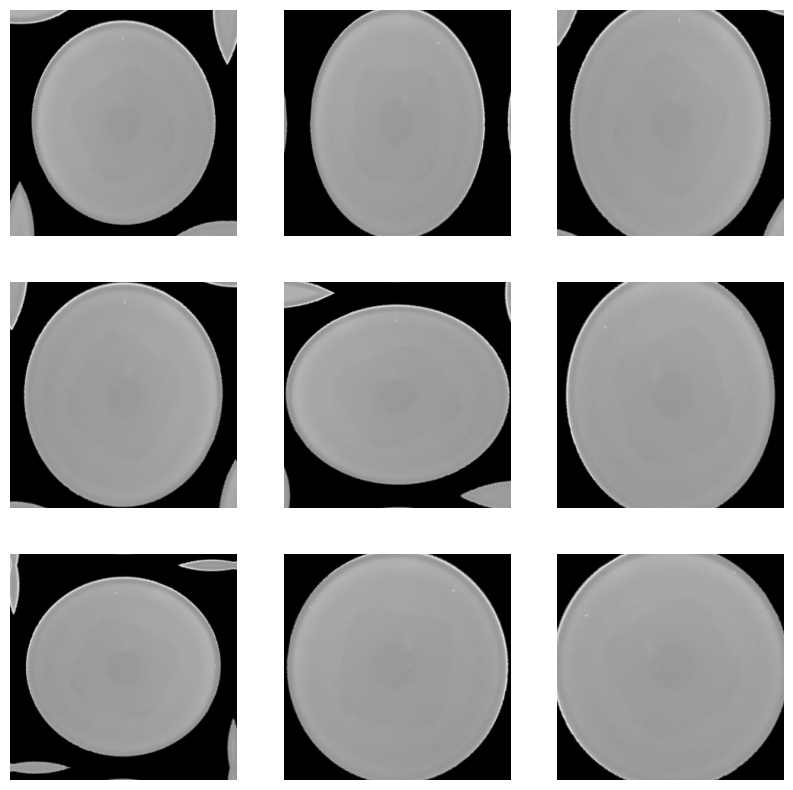

In [31]:
# 증강된 데이터 시각화로 확인
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
    for i in range(9):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

In [32]:
# 데이터의 크기가 0~1사이로 들어오도록 만들기, 2번째 방식을 채택
augmented_train_ds = train_ds.map(
    lambda x, y: (data_augmentation(x, training=True), y))

In [33]:
# train_ds 셔플시키기
train_ds = train_ds.shuffle(buffer_size=1000)

# train_data-set에 증강된 데이터 넣기
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf.data.AUTOTUNE,
)

# 미리 준비시켜놓기
train_ds = train_ds.prefetch(tf.data.AUTOTUNE)
val_ds = val_ds.prefetch(tf.data.AUTOTUNE)

### 모델 정의

In [35]:
import tensorflow as tf
from tensorflow.keras.applications import Xception
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.xception import preprocess_input, decode_predictions
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, BatchNormalization, Dropout
from tensorflow.keras.models import Model

# Load the Xception model with pretrained weights
base_model = Xception(weights='imagenet', include_top=False)

# Add your custom layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = BatchNormalization()(x)  # Add BatchNormalization
x = Dropout(0.5)(x)  # Add Dropout with a rate of 0.5
predictions = Dense(1, activation='sigmoid')(x)

# Create the final model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze layers of the base model (optional)
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


### 모델 학습 시작

In [36]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
# 모델 학습하기
epochs = 10     #실험용이라서 epoch을 10으로 수행
# 모델 저장
checkpoint_path = '/content/drive/MyDrive/Colab Notebooks/team_project(sample).h5' # team_project2 이라는 이름으로 저장
checkpoint_callback = callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                monitor='val_accuracy',
                                                save_best_only=True,
                                                save_weights_only=False,
                                                verbose=1)

model.compile(
    optimizer=keras.optimizers.Adam(1e-4),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)
model.fit(
    train_ds,
    epochs=epochs,
    callbacks=checkpoint_callback,
    validation_data=val_ds,
    # class_weight=class_weights  # Add class weights here
)

Epoch 1/10
62/62 [==============================] - ETA: 0s - loss: 0.8948 - accuracy: 0.4985
Epoch 1: val_accuracy improved from -inf to 0.54242, saving model to /content/drive/MyDrive/Colab Notebooks/team_project(sample).h5
62/62 [==============================] - 71s 826ms/step - loss: 0.8948 - accuracy: 0.4985 - val_loss: 0.6929 - val_accuracy: 0.5424
Epoch 2/10
62/62 [==============================] - ETA: 0s - loss: 0.8650 - accuracy: 0.4970
Epoch 2: val_accuracy did not improve from 0.54242
62/62 [==============================] - 67s 824ms/step - loss: 0.8650 - accuracy: 0.4970 - val_loss: 0.6903 - val_accuracy: 0.5159
Epoch 3/10
62/62 [==============================] - ETA: 0s - loss: 0.8097 - accuracy: 0.5136
Epoch 3: val_accuracy did not improve from 0.54242
62/62 [==============================] - 73s 925ms/step - loss: 0.8097 - accuracy: 0.5136 - val_loss: 0.6980 - val_accuracy: 0.4985
Epoch 4/10
62/62 [==============================] - ETA: 0s - loss: 0.8318 - accuracy: 0

### confusion matrix

42/42 [==============================] - 16s 318ms/step
Accuracy: 0.49318181818181817
Precision: 0.0
Recall: 0.0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


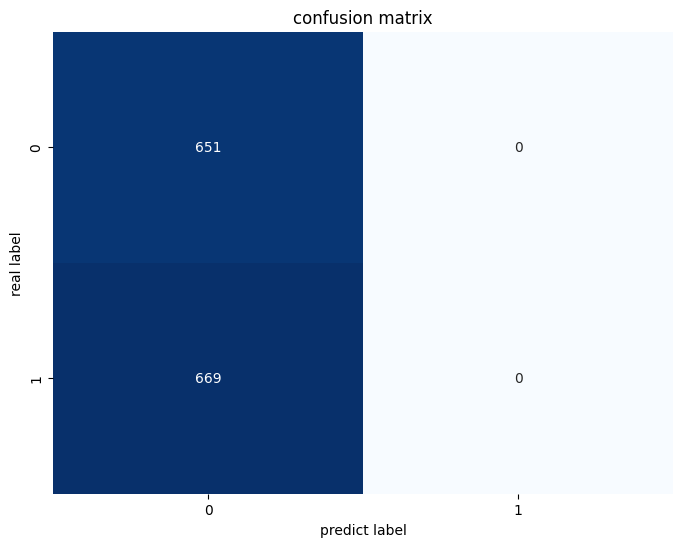

In [37]:
# 모델 import
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

# 모델 불러오기
checkpoint_path = '/content/drive/MyDrive/Colab Notebooks/team_project(sample).h5'
loaded_model = tf.keras.models.load_model(checkpoint_path)

# 검증 데이터에 대한 예측 확률 획득
val_probabilities = loaded_model.predict(val_ds)

# 확률을 이진 예측으로 변환 (0 또는 1)
val_predictions = np.argmax(val_probabilities, axis=1)

# 검증 데이터의 실제 레이블 얻기
val_true_labels = np.concatenate([y for x, y in val_ds], axis=0)

# Calculate accuracy, precision, and recall
accuracy = accuracy_score(val_true_labels, val_predictions)
precision = precision_score(val_true_labels, val_predictions)
recall = recall_score(val_true_labels, val_predictions)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)



# 혼동 행렬 계산
confusion = confusion_matrix(val_true_labels, val_predictions)

# 혼동 행렬 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("predict label")
plt.ylabel("real label")
plt.title("confusion matrix")
plt.show()

- sampling, batchnormalization, dropout을 추가해도 confusion matrix는 변동없음

### 모델 재학습

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks

# 최신 체크포인트 불러오기
checkpoint_path = '/content/drive/MyDrive/Colab Notebooks/team_project2.h5'
loaded_model = keras.models.load_model(checkpoint_path)

# 같은 데이터로 훈련 계속하기
epochs = 25

# 최상의 모델을 저장할 파일 경로 지정
best_model_path = '/content/drive/MyDrive/Colab Notebooks/team_project2.h5' #기존 모델을 대체하여 저장

# ModelCheckpoint를 사용하여 검증 정확도 기준으로 최상의 모델 저장
checkpoint_callback = callbacks.ModelCheckpoint(filepath=best_model_path,
                                                monitor='val_accuracy',
                                                save_best_only=True,
                                                save_weights_only=False,
                                                verbose=1)

loaded_model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="binary_crossentropy",
    metrics=["accuracy"],
)

loaded_model.fit(
    train_ds,
    epochs=epochs,
    callbacks=[checkpoint_callback],
    validation_data=val_ds,
)


Epoch 1/25
77/77 [==============================] - ETA: 0s - loss: 0.5385 - accuracy: 0.7117
Epoch 1: val_accuracy improved from -inf to 0.69128, saving model to /content/drive/MyDrive/Colab Notebooks/team_project2.h5
77/77 [==============================] - 161s 1s/step - loss: 0.5385 - accuracy: 0.7117 - val_loss: 3.8657 - val_accuracy: 0.6913
Epoch 2/25
77/77 [==============================] - ETA: 0s - loss: 0.4359 - accuracy: 0.7893
Epoch 2: val_accuracy improved from 0.69128 to 0.74985, saving model to /content/drive/MyDrive/Colab Notebooks/team_project2.h5
77/77 [==============================] - 106s 1s/step - loss: 0.4359 - accuracy: 0.7893 - val_loss: 1.1998 - val_accuracy: 0.7498
Epoch 3/25
77/77 [==============================] - ETA: 0s - loss: 0.3544 - accuracy: 0.8438
Epoch 3: val_accuracy did not improve from 0.74985
77/77 [==============================] - 102s 1s/step - loss: 0.3544 - accuracy: 0.8438 - val_loss: 1.8279 - val_accuracy: 0.6388
Epoch 4/25
77/77 [======

# 목표

- 혼동행렬이 편향됨, val_accuracy가 변화가 없다 = 데이터세트가 0과 1로 구분될만큼 특징점이 잡히지 않았다는 의미 => 이미지를 원형으로 자르고 시도해보기로 결정
- val_accuracy변화를 위해 데이터증강을 수행하지 않도록 해보자
- 이미지 크기가 작아서 데이터가 편향되는 것임 -> 이미지 크기를 늘리면 편향을 막을수도 있다

# 적용한 내용
### 전처리과정
- 이미지 원형으로 자르기
- 디코드가 안되는 이미지 제거


### 모델의 변경사항
- lr을 1e-04로 변경
- Xception으로 모델 변경 및 전이학습 실행

결론
- 데이터 증강을 수행하지 않음으로 val_accu 증가
- 이미지 사이즈는 confusin matrix 편향에 큰 영향을 미치지 않음, 일정 범위를 넘어가도록 이미지가 커질경우, 학습에 자원을 너무 많이 잡아먹어서 가동 불가


 고려사항
- train과 val 모두 원형이미지를 기준으로 실행했으니, 실제 test를 적용하려면 해당 test 데이터도 원형으로 자르는 과정을 거쳐야 할 것

Xception 모델은 input이 299x299 이기 때문에 채택  
출처 : https://kr.mathworks.com/help/deeplearning/ref/xception.html

수행작업 :
1. batchnormalization 적용
2. 언더 샘플링(정상과 비정상 파일 개수 동일시)
3. dropout 적용
4. 데이터 증강(회전, 뒤집기, zoom)
결과 : confusion matrix는 여전히 편향
이유 : 데이터의 수가 너무 적음, 데이터가 정상이랑 비정상이 잘 구분이 안됨

마지막 해결방안 : 데이터 라벨링작업 재시작